In [33]:
import pandas as pd
df = pd.read_csv(r"C:\FUTURE INTERNS\Task 2\Dataset\Telco_Customer_Churn.csv")
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [34]:
df.drop('customerID', axis=1, inplace=True)

In [35]:
print(df.describe())
print("Info:\n",df.info())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService

In [36]:
print((df.isnull().sum()))
print(type(df))

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>


In [37]:
print(df['PhoneService'].unique())

['No' 'Yes']


In [38]:
print(df['MultipleLines'].unique())

['No phone service' 'No' 'Yes']


In [39]:
print(df['InternetService'].unique())

['DSL' 'Fiber optic' 'No']


In [40]:
print(df['OnlineSecurity'].unique())

['No' 'Yes' 'No internet service']


In [41]:
# Convert TotalCharges to numeric, set errors='coerce' to turn invalid strings into NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill NaN (was previously empty string or space) with column median (or zero, optionally)
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [42]:
# Impute any remaining NaN in the data
df.fillna(df.median(numeric_only=True), inplace=True)  # for numeric columns
df.fillna('No', inplace=True)  # for categorical columns (optional, adjust as needed)

In [43]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Female': 1, 'Male': 0})

In [44]:
multi_cat_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

In [45]:
print(df.head())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1           29.85         29.85      0  ...   
1                 0           56.95       1889.50      0  ...   
2                 1           53.85        108.15      1  ...   
3                 0           42.30       1840.75      0  ...   
4                 1           70.70        151.65      1  ...   

   TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0                0                                0                0   
1                0                    

In [46]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [48]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
X_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(X_test[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [49]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

[[929 106]
 [188 186]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

ROC-AUC: 0.8256464904802502


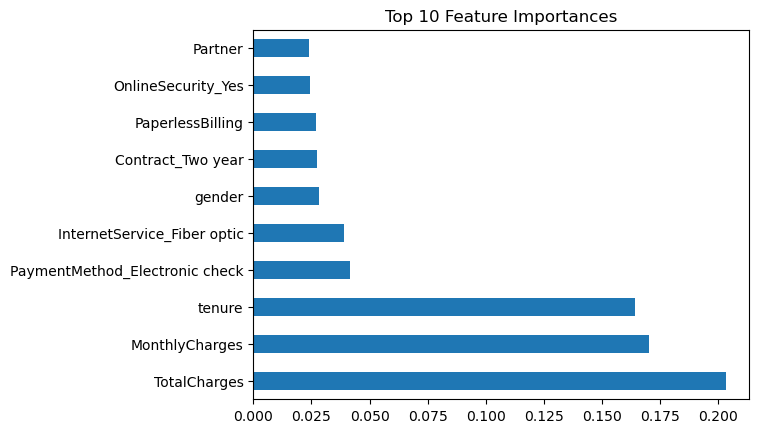

In [53]:
importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

In [54]:
# Makes a file which stores the top 10 features along with it's score of importance
importances = pd.Series(model.feature_importances_, index=X_train.columns)
top_features = importances.nlargest(10)
# Convert Series to DataFrame: columns will be 'Feature' and 'Importance'
top_features_df = top_features.reset_index()
top_features_df.columns = ['Feature', 'Importance']
top_features_df.to_csv('feature_importance.csv', index=False)


In [55]:
from sklearn.metrics import classification_report
import pandas as pd

my_report = classification_report(y_test, y_pred, output_dict=True)
my_table = pd.DataFrame(my_report).transpose()
my_table.to_csv('my_scores.csv')


[[929 106]
 [188 186]]


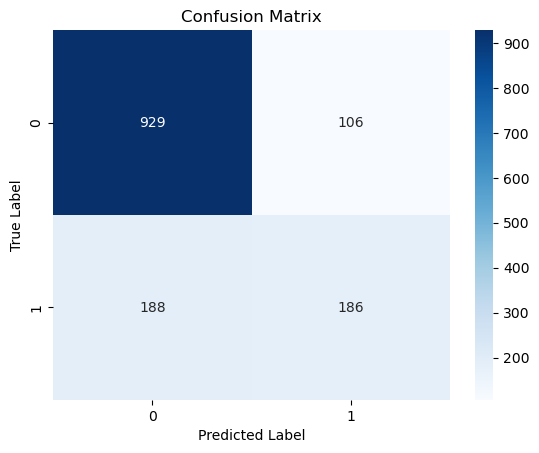

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# y_test is the true labels
# y_pred is the predicted labels by your model

cm = confusion_matrix(y_test, y_pred)

# Print the matrix
print(cm)

# Visualize confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
